In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Disease Prediction/Dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


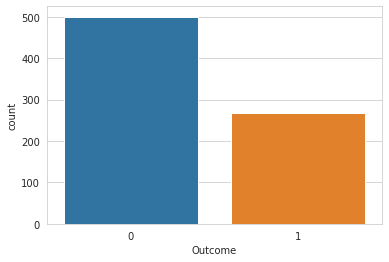

In [5]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x = 'Outcome', data = data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


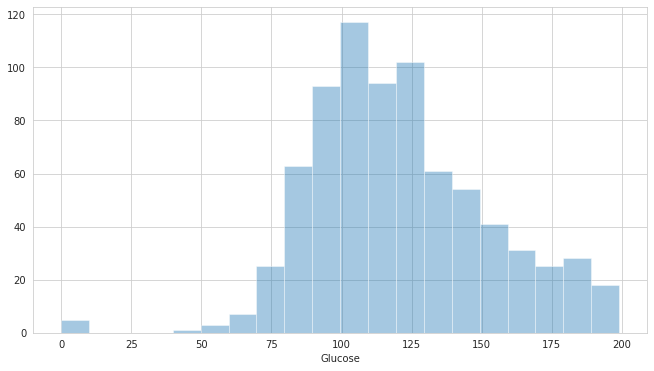

In [6]:
plt.figure(figsize=(11,6))
sns.distplot(data['Glucose'],kde=False,bins=20)
#maximum have a thalach Glucose 90-130 i.e person having Glucose rate 90-130 suffer from diabetes

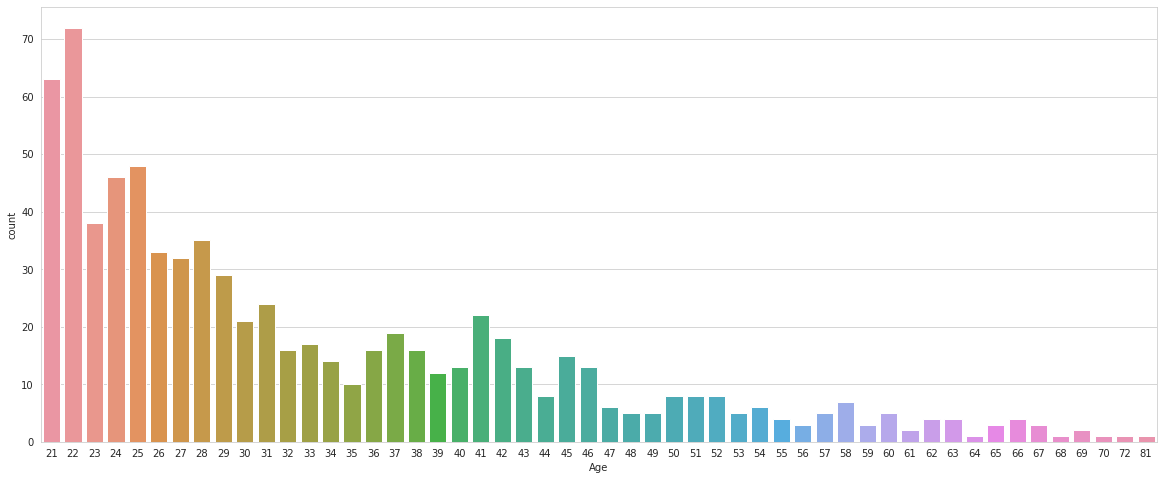

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['Age'])

In [ ]:
correlation=data.corr()
print(correlation['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


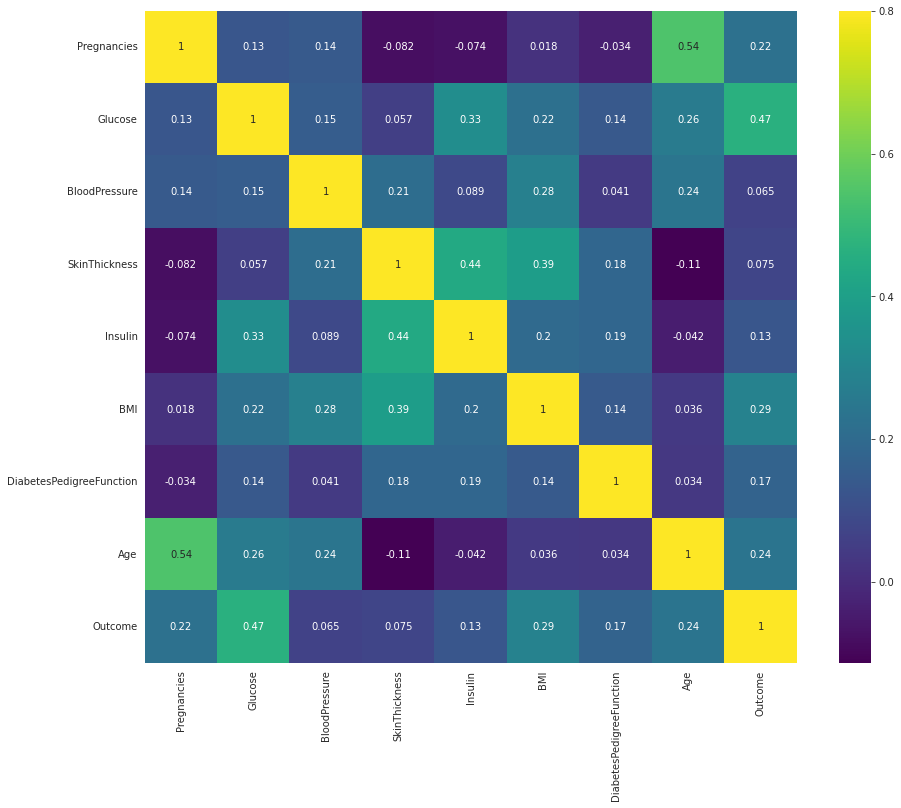

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation,annot=True,cmap='viridis',square=True,vmax=0.8)

In [7]:
X = data.iloc[:,:-1]
y = data['Outcome']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [9]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (614, 8) (614,)
Test Set:  (154, 8) (154,)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

In [11]:
RANDOM_STATE = 42

model_params = {
    'SVC': {
        'model': SVC(random_state=RANDOM_STATE),
        'params' : {
            'C': [1,2,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(var_smoothing=1e-2),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'K-nearest neighbors': {
        'model': KNeighborsClassifier(),
        'params': {}
    },
    'Gradient boosting classifiers': {
        'model': GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
        'params': {
            'learning_rate': [0.001, 0.01, 0.005],
            'n_estimators': [10,20,30]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [ ]:
from sklearn.model_selection import GridSearchCV

scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'Model': model_name,
        'Accuracy': clf.best_score_,
        'best_params': clf.best_params_
    })
    
result = pd.DataFrame(scores,columns=['Model','Accuracy','best_params'])

In [ ]:
comparison = result.sort_values(by = "Accuracy", ascending = False)
comparison

,Model,Accuracy,best_params
0,SVC,0.780168,"{'C': 10, 'kernel': 'rbf'}"
2,logistic_regression,0.772078,{'C': 1}
1,random_forest,0.758963,{'n_estimators': 10}
7,decision_tree,0.755738,{'criterion': 'entropy'}
3,naive_bayes_gaussian,0.754072,{}
5,K-nearest neighbors,0.728082,{}
6,Gradient boosting classifiers,0.659616,"{'learning_rate': 0.001, 'n_estimators': 10}"
4,naive_bayes_multinomial,0.604185,{}


## Final Model

In [12]:
classifier1 = SVC(C= 10, kernel= 'rbf', random_state=RANDOM_STATE)
classifier1.fit(X_train, y_train)

SVC(C=10, random_state=42)

In [13]:
y_pred = classifier1.predict(X_test)
y_pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 79.15%
Test Accuracy is : 70.78%


In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        95
           1       0.71      0.41      0.52        59

    accuracy                           0.71       154
   macro avg       0.71      0.65      0.65       154
weighted avg       0.71      0.71      0.69       154



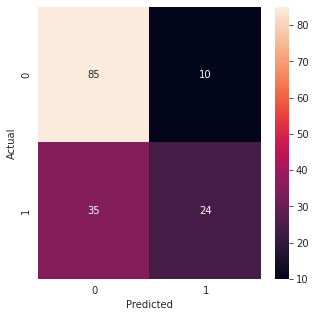

In [16]:
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

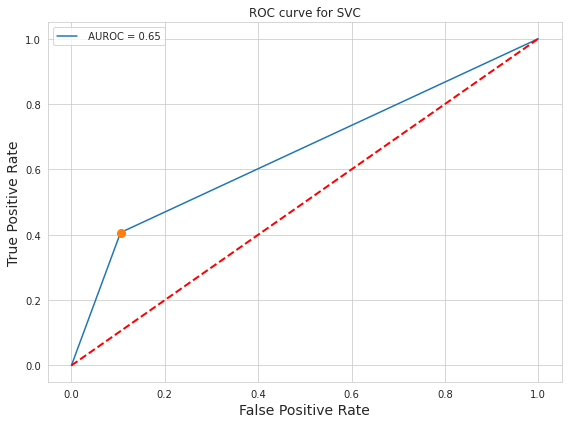

In [17]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()